In [35]:
import pandas as pd
import seaborn as sns

# **Importing the Excel into CS**

In [19]:
data = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [22]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [73]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [74]:
data.isnull()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


From this above table we can clearly see that the AOV is 3145.128 ~ 3145.13 which cannot be the case as the shops are selling at an affordable rate.

# First : Analyzing the data 
Sorting the data according to the order_amount 




In [25]:
sorted_amount = data.sort_values('order_amount', inplace=False, ascending=False)
sorted_amount

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


We can observe some really huge order values. 

Grouping the data according to the shop_id and calculating the AOV to see which shop has what AOV

In [33]:
aov_by_shop = data.groupby(['shop_id']).mean('order_amount').reset_index()[['shop_id', 'order_amount']]
aov_by_shop

,shop_id,order_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


 Plotting the data for better understanding

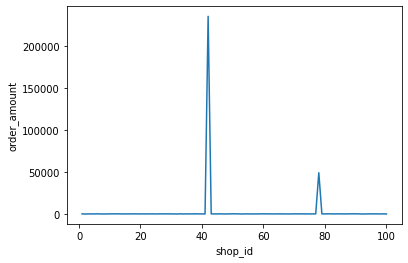

In [36]:
sns.lineplot(data=aov_by_shop, x="shop_id", y="order_amount")

It is pretty evident from the sudden spikes in the graph that shop numbers around 40 - 45 and shop numbers around 75 - 80 have irregular or high data

In [37]:
aov_by_shop.sort_values('order_amount', ascending=False)

,shop_id,order_amount
41,42,235101.490196
77,78,49213.043478
49,50,403.545455
89,90,403.224490
37,38,390.857143
...,...,...
52,53,214.117647
99,100,213.675000
31,32,189.976190
1,2,174.327273


The shops having shop_id 42 and 78 have extremely high AOV

In [42]:
product_acc_price = data.groupby(['shop_id']).first().reset_index()
product_acc_price

,shop_id,order_id,user_id,order_amount,total_items,payment_method,created_at
0,1,42,847,316,2,debit,2017-03-20 14:58:02
1,2,125,983,188,2,credit_card,2017-03-13 13:07:20
2,3,49,714,296,2,debit,2017-03-20 16:48:03
3,4,280,869,128,1,credit_card,2017-03-05 8:27:05
4,5,75,862,142,1,credit_card,2017-03-26 9:14:45
...,...,...,...,...,...,...,...
95,96,223,829,765,5,debit,2017-03-13 15:16:25
96,97,22,789,486,3,credit_card,2017-03-04 15:44:00
97,98,120,745,266,2,credit_card,2017-03-17 20:34:44
98,99,45,759,195,1,credit_card,2017-03-02 8:13:24


In [43]:
product_acc_price['product_price'] = product_acc_price.order_amount / product_acc_price.total_items
product_acc_price

,shop_id,order_id,user_id,order_amount,total_items,payment_method,created_at,product_price
0,1,42,847,316,2,debit,2017-03-20 14:58:02,158.0
1,2,125,983,188,2,credit_card,2017-03-13 13:07:20,94.0
2,3,49,714,296,2,debit,2017-03-20 16:48:03,148.0
3,4,280,869,128,1,credit_card,2017-03-05 8:27:05,128.0
4,5,75,862,142,1,credit_card,2017-03-26 9:14:45,142.0
...,...,...,...,...,...,...,...,...
95,96,223,829,765,5,debit,2017-03-13 15:16:25,153.0
96,97,22,789,486,3,credit_card,2017-03-04 15:44:00,162.0
97,98,120,745,266,2,credit_card,2017-03-17 20:34:44,133.0
98,99,45,759,195,1,credit_card,2017-03-02 8:13:24,195.0


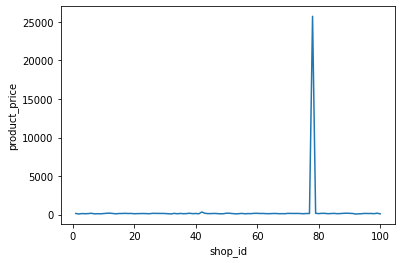

In [45]:
sns.lineplot(data=product_acc_price, x="shop_id", y="product_price")

From the above graph we can observe that the shop having shop_id arounf 80 is selling products at a very high value.

In [46]:
product_acc_price.sort_values('product_price', ascending=False)

,shop_id,order_id,user_id,order_amount,total_items,payment_method,created_at,product_price
77,78,161,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
41,42,16,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
11,12,108,732,201,1,credit_card,2017-03-21 20:26:18,201.0
88,89,206,747,588,3,debit,2017-03-04 4:01:38,196.0
98,99,45,759,195,1,credit_card,2017-03-02 8:13:24,195.0
...,...,...,...,...,...,...,...,...
52,53,1,746,224,2,cash,2017-03-13 12:36:56,112.0
99,100,14,709,111,1,cash,2017-03-22 2:39:49,111.0
31,32,217,862,202,2,debit,2017-03-09 16:46:07,101.0
1,2,125,983,188,2,credit_card,2017-03-13 13:07:20,94.0


Shop_id = 78 is having highest AOV. This also means that all the order values by Shop 78 are outliers.

# Handling Outliers

Assuming that the orders from shop 78 were entered with wrong placement of the decimal, could have lead into the high order values. It should have been 257.25 instead of 25725. Assuming the correct value to be 257.25 and carrying out the rest of the operations.

In [50]:
# Changing datatype of data-frame from integer to float to accept decimal values for pricing.
# (Also converting payment_method and created_at fields to clean and maintain the data quality)
data = data.astype({'order_amount': 'float', 'payment_method': 'string', 'created_at': 'string'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   int64  
 1   shop_id         5000 non-null   int64  
 2   user_id         5000 non-null   int64  
 3   order_amount    5000 non-null   float64
 4   total_items     5000 non-null   int64  
 5   payment_method  5000 non-null   string 
 6   created_at      5000 non-null   string 
dtypes: float64(1), int64(4), string(2)
memory usage: 273.6 KB


In [51]:
# replacing data with correct value
data.loc[data['shop_id'] == 78, 'order_amount'] /= 100

In [52]:
data[(data.shop_id == 78) & (data.total_items == 1)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,2.5725,1,credit_card,2017-03-12 5:56:57
1056,1057,78,800,2.5725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,2.5725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,2.5725,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,2.5725,1,cash,2017-03-17 16:38:06


# **Calculating AOV with correct value**

In [53]:
data.order_amount.mean()

2692.413275999997

New AOV is 2692.4135

# **Analyzing net data for proposing metrics**

Trying to figure out if there is a relation between the number of sneakers sold by a prticular shop.

In [54]:
shop_order_count = data.groupby('shop_id').size().reset_index(name='count')

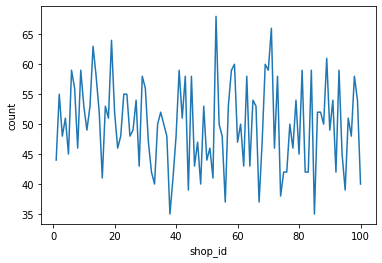

In [55]:
sns.lineplot(data=shop_order_count, x="shop_id", y="count")


No evdident observations can be made from this. Lets try to find out if there is a correlation between the number of items in each order.

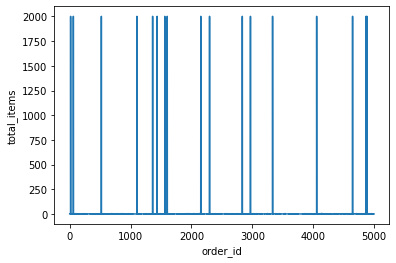

In [56]:
sns.lineplot(data=data, x="order_id", y="total_items")

Sudden spikes in the data show that due to high number of sneakers being ordered in some orders the AOV can be high. These orders are resulting in the high value of AOV. 

## **Proposed Soltuion:**

Since high orders (orders with high items being orderes) can be the reason for erraneous calculation of the AOV. It is suggested to not use these orders as they can act as a outlier and result in erraneous calculation of AOV as AOV can be part of important decision making such as minimum order value to provide free shipping etc.

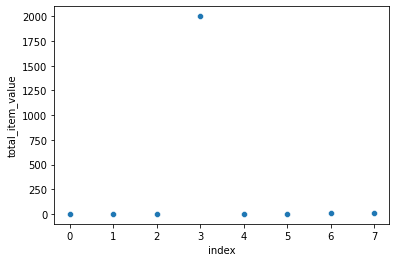

In [57]:
unique_total_items_value = pd.DataFrame({'index': range(0, data.total_items.nunique()), 'total_item_value': data.total_items.unique()})
sns.scatterplot(data=unique_total_items_value, x='index', y='total_item_value')

In [64]:
# counting exceptional orders
data[data.total_items > 10].count()

order_id          17
shop_id           17
user_id           17
order_amount      17
total_items       17
payment_method    17
created_at        17
dtype: int64

In [65]:
# counting exceptional orders
data_without_exception_orders = data[data.total_items <= 10]

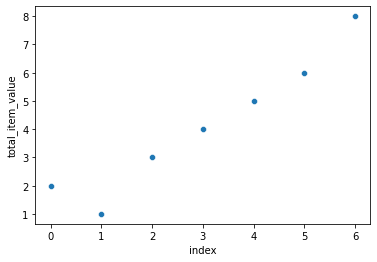

In [66]:
data_without_exception_orders_unique_total_items_value = pd.DataFrame({'index': range(0, data_without_exception_orders.total_items.nunique()), 'total_item_value': data_without_exception_orders.total_items.unique()})
sns.scatterplot(data=data_without_exception_orders_unique_total_items_value, x='index', y='total_item_value')

In [67]:
data_without_exception_orders.order_amount.mean()

299.8327072044954

AOV based on suggested method is 299.83 which sounds more reasonable. This value can be an important meaningful insight for critical decision makings.

# **Answer to Question 1:**


*   There are no duplicated or null values in the data so there is not much need for cleaning the data.
*   There is a major outlier which is shop 78 which, due to some technical error shoed some extremely high order values.
*   Disregarding the outlier, the correct AOV comes to be around 299.83.




